## Definition of IRL

IRL is the problem of **finding the environment’s reward function** given observations of the behaviour of an optimally-behaving agent

### Motivation

1. we may want to replicate behaviour of some entity by using well-tested reinforcement learning methods, but a reward function suited to this task may be arbitrarily complex, abstract, or difficult to describe.

2. we may want to know the reward function itself, to explain the behaviour of an existing agent

----

### Path (or Trajectory)

A **path** taken through an MDP by an agent is denoted $\zeta$, and is an ordered list of state and action tuples $\zeta \ =\ [(s_1,\ a_1),\ (s_2,\ a_2),\ .......]$

### Feature vectors

a state feature is a vector, $f(s)\ =\ [\ f_{1}(s),\ f_{2}(s),\ f_{3}(s),\ ...,\ f_{D}(s)\ ]$, D is the feature space dimentionality

### Path feature counts

path feature counts is the **sum of the state feature** alone the path 

$${ f(\zeta)\ = \sum_{s_{i}\ \in \ \zeta} f(s_i) }$$


> **discounted feature counts**: $${ f(\zeta)\ = \sum_{t\ =\ 1}^{N} \gamma^i\ f(s_t) }$$ here N is the path length

### Reward function of path

reward function is given as a combination of path feature counts with weights such that

$${R(\ \zeta \ )\ =\ \sum_{(s_i,\ a_i)\ \in \ \zeta } R(\ s_i\ ) \ = \theta \  f(\zeta) \ =  \sum_{s_{i}\ \in \ \zeta} \theta \ f(s_i) }$$

here $\theta \ = [\theta_1,\ \theta_2,\ ,...,\ \theta_D]^{\rm T}$ 

### Feature expectation

** Feature expectation** is the **average feature counts** over all paths

$${ \tilde{f} \ =\ \sum_{all\ paths\ \zeta} P(\zeta)\ f(\zeta) }$$

and ** Empirical feature expectation** is an **approximatation** of Feature expectation

$${\tilde{f} \approx \tilde{f}_{demonstration}\ =\ \frac{1}{M} \sum_{i=1}^{M}f(\zeta_{i})}$$

here, M is the amount of demonstrated paths

-----

## Understand the IRL from probabilistic perspective

1. There exists a latent **probabilistic distribution of paths(trajectories)**, 
2. This distribution **match the constraint condition of feature expectation**. 
3. This distribution generates the **demonstrated paths**.

There maybe many distributions match above conditions, so, **which distribution is best? **

> **The one with largest entropy is best !**, because it doesn't exhibit any additional preferences beyond matching feature expectations

Then, the problem convert to a **entropy optimalization problem**

#### Maximum Entropy Principle
> from wikipedia: The principle of maximum entropy states that the probability distribution which best represents the current state of knowledge is the one with largest entropy, in the context of precisely stated prior data

----

## Maximum entropy IRL formulation

the optimalization problem here is: 

$${
\begin{equation}
\begin{aligned}
&\max \limits_{P \in C}\ H(P)\ =\ -\sum_{\zeta} P(\zeta)\log(P(\zeta))\\
&s.t.\  \sum_{\zeta} P(\zeta)\ f(\zeta) \ =\ \tilde{f}  \\
&\sum_{\zeta} P(\zeta)\ =\ 1\\
\end{aligned}
\end{equation}
}$$

Then, we could apply the method of **Lagrange multipliers**, here the **weights of reward function are seen as the Lagrange multipliers**, below is the formulation

$${ L(P,\ \theta)\ =\ -H(P)\ -\ \sum_{i=1}^{D} \theta_{i}\ (\ Pf_{i}\ -\ \tilde{f}_{i})\ -\ \theta_{0}(\sum_{\zeta} P\ -\ 1) }$$

> remind that the reward function parameters $\theta \ = [\theta_1,\ \theta_2,\ ,...,\ \theta_D]^{\rm T}$ 


(optimization priciple)Then the origin optimalization problem is equivalent to:

$$\max \limits_{\theta} \min \limits_{P \in C} L(P,\ \theta)$$

### Solve the optimalization
#### Stage 1:  process $P$

$$ \frac{\partial L}{\partial P}\ =\ \sum_{\zeta} \log(P)\ +\ 1\ -\ \sum_{i=1}^{D} \theta_{i} f_{i}\ -\ \theta_0\ =\ 0$$

then we get

$$P\ =\ \frac{\exp \ (\ \sum_{i=1}^{D} \theta_{i} f_{i}\ )}{\exp \ (\ 1-\theta_0\ )}$$

as $\sum_{\zeta} P(\zeta)\ =\ 1$

so,

$${
\begin{equation}
\begin{aligned}
P(\zeta)\ &=\ \frac{1}{\exp \ (\ 1-\theta_0\ )} \exp \ (\ \sum_{i=1}^{D} \theta_{i} f_{i}(\zeta)\ ) \\
&=\frac{1}{Z(\theta)} \exp \ (\ \sum_{i=1}^{D} \theta_{i} f_{i} (\zeta)\ )\\
&=\frac{1}{Z(\theta)} \exp \ (\ \theta \  f(\zeta)\ )\\
\end{aligned}
\end{equation}
}$$


This kind distribution is called **Gibbs distribution or Boltzmann distribution**

while 
$Z(\theta)\ =\ \sum_{\zeta}\exp \ (\ \theta \  f(\zeta)\ )$, it is called **Partition function**, acting as a normalization term

#### Stage 2: process $\theta$

here, **maximise the log-likelihood** of the demonstrated paths under the maximum entropy distribution derived above


$${
\begin{equation}
\begin{aligned}
\theta^{*}\ &=\ \mathop{\arg\max}_{\theta} L(\theta) \\
&=\ \mathop{\arg\max}_{\theta} \frac{1}{M} \sum_{i=1}^{M} \log (P(\zeta_{i}\ |\ \theta)) \\
&=\ \mathop{\arg\max}_{\theta} \frac{1}{M} \sum_{i=1}^{M} (\ \theta f(\zeta_{i})\ -\ \log (\ Z(\theta)\ )\ ) \\
\end{aligned}
\end{equation}
}$$

the gridient of $L$ is


$${
\begin{equation}
\begin{aligned}
\nabla_{\theta} (L(\theta))\ &=\ \frac{1}{M} \sum_{i=1}^{M} (f(\zeta_{i})\ -\ \frac{1}{Z(\theta)} \frac{\partial Z(\theta)}{\partial \theta}) \\
&=\ \tilde{f}_{demonstration}\ -\  \frac{1}{Z(\theta)} \frac{\partial Z(\theta)}{\partial \theta}  \\
&=\ \tilde{f}_{demonstration}\ -\  \frac{\sum_{\zeta} f(\zeta)  \exp \ (\ \theta \  f(\zeta)\ )}{\sum_{\zeta} \exp \ (\ \theta \  f(\zeta)\ )} \\
&=\ \tilde{f}_{demonstration}\ -\  \sum_{\zeta} P(\zeta \ |\ \theta)f(\zeta) \\
&=\ \tilde{f}_{demonstration}\ -\  \sum_{s} D(s_i)f(s_i) \\
\end{aligned}
\end{equation}
}$$


 

here, $D(s_i)$ is called the **expected state visitation frequencies**

so, how to compute the $D(s_i)$ ? we will discuss it later

----

Now, we get final general maximum entropy inverse reinforment learning algorithm
## Algorithm MaxEnt IRL 

1. $S$: set of demonstrated paths
2. $\theta \ \leftarrow \ \theta_0$
3. **While** not converged **do**
> * Use value iteration to solve MDP($\theta$) for the optimal policy $\pi (a|s,\theta)$
> * Compute state visitation frequencies $D(s)$ using **dynammic programming**
> * Compute gradient of $L$
> * $\theta \ \leftarrow \ \theta \ +\ \alpha \nabla_{\theta} (L)$

------

## Talk is cheap, show me your code! Let's start

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class GridWorld(object):
	
	def __init__(self, grid_size, discount):
		self.actions = ((1, 0), (0, 1), (-1, 0), (0, -1))
		self.n_actions = len(self.actions)
		self.n_states = grid_size ** 2
		self.grid_size = grid_size
		self.discount = discount
		self.transition_probability = self.get_transition_probability(self.n_states, self.n_actions)
	
	def get_transition_probability(self, n_states, n_actions):
		
		trans_mat = np.zeros((n_states, n_actions, n_states))
		for s in range(n_states):
			for a in range(n_actions):
				for e in range(n_states):
					s_x, s_y = self.int_to_point(s)
					e_x, e_y = self.int_to_point(e)
					
					a_x, a_y = self.actions[a]
					
					if not self.neighbouring((s_x, s_y), (e_x, e_y)):
						continue
					
					if (s_x + a_x, s_y + a_y) == (e_x, e_y):
						trans_mat[s, a, e] = 1
						continue
						
					# same point, the edge condition
					if self.is_egde((s_x, s_y)) and (s_x, s_y) == (e_x, e_y):
						# stay s if it want to move off the grid
						if not (0 <= s_x + a_x <= self.grid_size - 1 and 0 <= s_y + a_y <= self.grid_size - 1):
							trans_mat[s, a, e] = 1
					
		return trans_mat
		
	def int_to_point(self, i):
		return (i % self.grid_size, i // self.grid_size)
	
	def point_to_int(self, p):
		return p[0] + p[1] * self.grid_size
	
	def neighbouring(self, i, k):
		return abs(i[0] - k[0]) + abs(i[1] - k[1]) <= 1
	
	def is_egde(self, i):
		return i[0] == 0 or i[0] == self.grid_size - 1 or i[1] == 0 or i[1] == self.grid_size - 1
	
	def reward(self, s):
	
		if s == self.n_states - 1:
			return 1
		return 0
	
	def reward_ground_truth(self):
		r = np.zeros((self.n_states, 1))
		for s in range(self.n_states):
			state_reward = self.reward(s)
			r[s] = state_reward
		return r
		
	def state_features(self):
		return np.eye(self.n_states, self.n_states)
	
	def optimal_policy(self, s):
		s_x, s_y = self.int_to_point(s)

		if s_x < self.grid_size and s_y < self.grid_size:
			return np.random.randint(0, 2)
		if s_x < self.grid_size - 1:
			return 0
		if s_y < self.grid_size - 1:
			return 1
	
	def generate_trajectories(self, m_trajs, len_traj, policy, random_start=False):
		trajectories = []
		
		for _ in range(m_trajs):
			if random_start:
				s_x, s_y = np.random.randint(self.grid_size), np.random.randint(self.grid_size)
			else:
				s_x, s_y = 0, 0
			
			trajectory = []
			for _ in range(len_traj):
				a_x, a_y = self.actions[policy(self.point_to_int((s_x, s_y)))]
				
				e_x = s_x
				e_y = s_y
				
				if (0 <= s_x + a_x < self.grid_size and 0 <= s_y + a_y < self.grid_size):
					e_x = s_x + a_x
					e_y = s_y + a_y
				
				state_int = self.point_to_int((s_x, s_y))
				action_int = policy(self.point_to_int((s_x, s_y)))
				
				trajectory.append((state_int, action_int))
				
				s_x = e_x
				s_y = e_y
				
			trajectories.append(trajectory)
		
		return np.array(trajectories)

In [16]:
def normalize(vals):
	min_val = np.min(vals)
	max_val = np.max(vals)
	return (vals - min_val) / (max_val - min_val)


def get_feature_expectation(trajs, state_features, d_feature):
	feature_expectation = np.zeros(d_feature)
	for i in range(len(trajs)):
		for j in range(len(trajs[i])):
			state = trajs[i][j][0]
			feature_expectation += state_features[state, :]
		
	feature_expectation = feature_expectation / len(trajs)
	return feature_expectation


def value_iteration(transitions, rewards, gamma, error=0.01, deterministic=True):
	n_states, n_actions, _ = np.shape(transitions)
	
	values = np.zeros([n_states])
	
	# estimate values
	while True:
		values_tmp = values.copy()
		
		for s in range(n_states):
			# v_s = argmax q(s, a)
			values[s] = max(
				[
					sum([transitions[s, a, s1] * (rewards[s] + gamma * values_tmp[s1]) for s1 in range(n_states)]) for a in range(n_actions)
				]
			)
		
		if max([abs(values[s] - values_tmp[s]) for s in range(n_states)]) < error:
			break
	
	if deterministic:
		# generate deterministic policy
		policy = np.zeros([n_states])
		for s in range(n_states):
			policy[s] = np.argmax(
				[sum([transitions[s, a, s1] * (rewards[s] + gamma * values[s1]) for s1 in range(n_states)]) for a in range(n_actions)]
			)
		
		return values, policy
	else:
		# generate stochastic policy
		policy = np.zeros([n_states, n_actions])
		for s in range(n_states):
			v_s = np.array(
				[sum([transitions[s, a, s1] * (rewards[s] + gamma * values[s1]) for s1 in range(n_states)]) for a in range(n_actions)]
			)
			policy[s, :] = np.transpose(v_s / np.sum(v_s))
		return values, policy


def compute_state_visitation_frequency(transitions, gamma, trajs, policy, deterministic=True):
	n_states, n_actions, _ = np.shape(transitions)
	
	T = len(trajs[0])
	# mu[s, t] is the probability of visiting state s at time t
	mu = np.zeros([n_states, T])
	
	for traj in trajs:
		first_state = traj[0][0]
		mu[first_state, 0] += 1
		
	mu[:, 0] = mu[:, 0] / len(trajs)
	
	for t in range(T - 1):
		for s in range(n_states):
			if deterministic:
				mu[s, t + 1] = sum([mu[pre_s, t] * transitions[pre_s, int(policy[pre_s]), s] for pre_s in range(n_states)])
			else:
				mu[s, t + 1] = sum(
					[sum([mu[pre_s, t] * transitions[pre_s, a1, s] * policy[pre_s, a1] for a1 in range(n_actions)]) for pre_s in range(n_states)])
				
	p = np.sum(mu, 1)
	
	return p


def max_ent_irl(features, discount, transitions, trajectories, epochs=20, learning_rate=0.1):
	
	# feature expectation
	feature_expectation = get_feature_expectation(trajectories, features, features.shape[1])
	
	# init the reward parameters
	theta = np.random.uniform(size=(features.shape[1],))
	
	# start training!
	for epoch in range(epochs):
		if epoch % 10 == 0:
			print "epoch: ", epoch
		
		# compute reward function
		rewards = np.dot(features, theta)
		
		# compute policy given current reward
		_, policy = value_iteration(transitions, rewards, discount, error=0.01, deterministic=False)
		
		# compute the state visitation frequency
		svf = compute_state_visitation_frequency(transitions, discount, trajectories, policy, deterministic=False)
	
		# compute gradient given the current optimal policy
		gradient = feature_expectation - features.T.dot(svf)
		
        
		# update theta
		theta += learning_rate * gradient
	
	print "finish training!"
	
	rewards = np.dot(features, theta)
	
	return normalize(rewards)

In [20]:
def heatmap2d(hm_mat, title='',fig_num=1, text=True):
	plt.imshow(hm_mat, interpolation='nearest')
	plt.title(title)
	plt.colorbar()
	if text:
		for y in range(hm_mat.shape[0]):
			for x in range(hm_mat.shape[1]):
				plt.text(x, y, '%.1f' % hm_mat[y, x], horizontalalignment='center', verticalalignment='center',)
	

epoch:  0
epoch:  10
epoch:  20
epoch:  30
epoch:  40
epoch:  50
epoch:  60
epoch:  70
epoch:  80
epoch:  90
finish training!


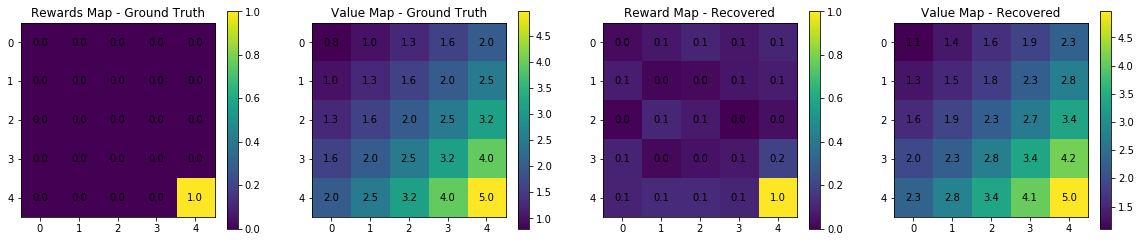

In [29]:
grid_size = 5
traj_length = 3 * grid_size
traj_counts = 100

discount = 0.8

epochs = 100
learning_rate = 0.01

gw = GridWorld(grid_size, discount)

transition_probability = gw.transition_probability

reward_ground_truth = gw.reward_ground_truth()

values_ground_truth, _ = value_iteration(transition_probability, reward_ground_truth, discount, error=0.01, deterministic=True)

demonstrated_trajectories = gw.generate_trajectories(traj_counts, traj_length, gw.optimal_policy, random_start=True)

features = gw.state_features()

reward_learned = max_ent_irl(
    features, discount, transition_probability, demonstrated_trajectories, epochs, learning_rate
)

values_learned, _ = value_iteration(transition_probability, reward_learned, discount, error=0.01, deterministic=True)

plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
heatmap2d(np.reshape(reward_ground_truth, (grid_size, grid_size), order='F'), 'Rewards Map - Ground Truth')

plt.subplot(1, 4, 2)
heatmap2d(np.reshape(values_ground_truth, (grid_size, grid_size), order='F'), 'Value Map - Ground Truth')
plt.subplot(1, 4, 3)
heatmap2d(np.reshape(reward_learned, (grid_size, grid_size), order='F'), 'Reward Map - Recovered')
plt.subplot(1, 4, 4)
heatmap2d(np.reshape(values_learned, (grid_size, grid_size), order='F'), 'Value Map - Recovered')
plt.show()